# Final Figure Harding Cove

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.ticker import ScalarFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable

import rasterio
from rasterio.plot import show

import geopandas as gpd
from shapely.geometry import Point

import cmocean
import cmocean.cm as cmo

from pyproj import Transformer
from scipy.interpolate import griddata
import xarray as xr
import utm

from matplotlib import colormaps

C:\Users\15093\anaconda3\envs\gpgn-318\Lib\site-packages\pyproj\network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


# For Both

In [2]:
tif = rasterio.open('2good harding cove_modified.tif')

# dataframe for new dataframe (see judes total_df notebook for addition of polygon location/measurement type and fins big_df notebook for all collected data)
total_df = pd.read_csv('total_df.csv')

# make dataframe for all of keystone measuremnts 
HAR_Full = total_df[total_df['Area'] == 'HAR']
# convert to from UTC to datetime to sort by date
HAR_Full['UTC Time'] = pd.to_datetime(HAR_Full['UTC Time'])
#KEY_Full
# make dataframe of keystone from the 18th
HAR_17 = HAR_Full[HAR_Full['UTC Time'].dt.date == pd.to_datetime('2025-05-17').date()]

utm_coords = [
    utm.from_latlon(lat, lon)
    for lat, lon in zip(HAR_17['Latitude'], HAR_17['Longitude'])
]

HAR_17['Easting']  = [c[0] for c in utm_coords]
HAR_17['Northing'] = [c[1] for c in utm_coords]

HAR_17


C:\Users\15093\AppData\Local\Temp\ipykernel_24892\3727853621.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HAR_Full['UTC Time'] = pd.to_datetime(HAR_Full['UTC Time'])
C:\Users\15093\AppData\Local\Temp\ipykernel_24892\3727853621.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HAR_17['Easting']  = [c[0] for c in utm_coords]
C:\Users\15093\AppData\Local\Temp\ipykernel_24892\3727853621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

,Unnamed: 0,Pressure (dbar),Depth (m),Temperature (°C),Conductivity (µS/cm),Specific Conductance (µS/cm),Salinity (PSS),Sound Velocity (m/s),Density (kg/m³),Latitude,Longitude,UTC Time,File Name,Area,Easting,Northing
1928,1928,0.150000,0.153172,11.061896,313.363922,434.480649,0.206302,1451.702039,999.763844,40.284984,-106.853796,2025-05-17 17:10:19,CC2435009_20250517_171019,HAR,342415.724635,4.461037e+06
1929,1929,0.450000,0.458883,11.023812,313.264091,434.801418,0.206434,1451.559730,999.769273,40.284984,-106.853796,2025-05-17 17:10:19,CC2435009_20250517_171019,HAR,342415.724635,4.461037e+06
1930,1930,0.750000,0.764803,10.986801,311.284568,432.498255,0.205289,1451.419841,999.773572,40.284984,-106.853796,2025-05-17 17:10:19,CC2435009_20250517_171019,HAR,342415.724635,4.461037e+06
1931,1931,1.050000,1.070721,10.860266,311.241828,433.964749,0.205923,1450.934636,999.788258,40.284984,-106.853796,2025-05-17 17:10:19,CC2435009_20250517_171019,HAR,342415.724635,4.461037e+06
1932,1932,1.350000,1.376634,10.761063,310.336380,433.902621,0.205830,1450.553453,999.799471,40.284984,-106.853796,2025-05-17 17:10:19,CC2435009_20250517_171019,HAR,342415.724635,4.461037e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,2208,2.550000,2.600261,10.647005,307.701478,431.595139,0.204631,1450.126337,999.815420,40.286394,-106.854360,2025-05-17 17:47:52,CC2435009_20250517_174752,HAR,342371.045730,4.461195e+06
2209,2209,2.850000,2.906168,10.622163,307.511077,431.628871,0.204630,1450.034087,999.819261,40.286394,-106.854360,2025-05-17 17:47:52,CC2435009_20250517_174752,HAR,342371.045730,4.461195e+06
2210,2210,3.150000,3.212074,10.611571,307.433204,431.647910,0.204632,1449.997495,999.821717,40.286394,-106.854360,2025-05-17 17:47:52,CC2435009_20250517_174752,HAR,342371.045730,4.461195e+06
2211,2211,3.450000,3.517979,10.607002,307.380883,431.629831,0.204619,1449.984421,999.823578,40.286394,-106.854360,2025-05-17 17:47:52,CC2435009_20250517_174752,HAR,342371.045730,4.461195e+06


# Harding for isobath

In [3]:
# modified for means with rows to only those with pressure < 4.95
HAR_17_mod = HAR_17[HAR_17['Pressure (dbar)'] <= 4.95]

# find mean between 0.15 and 4.95 dbar
meanedT = HAR_17_mod['Temperature (°C)'].mean()

# get each pressures rows for own df
pressure_p15   = HAR_17[np.isclose(HAR_17['Pressure (dbar)'], 0.15)].copy()
pressure_p75   = HAR_17[np.isclose(HAR_17['Pressure (dbar)'], 0.75)].copy()
pressure_1p35  = HAR_17[np.isclose(HAR_17['Pressure (dbar)'], 1.35)].copy()
pressure_4p95  = HAR_17[np.isclose(HAR_17['Pressure (dbar)'], 4.95)].copy()

# add a column in each dataframe with the value of the temp minus the mean
for df in [pressure_p15, pressure_1p35, pressure_4p95]:
    df['meantemp'] = df['Temperature (°C)'] - meanedT


# Harding for Transcet

In [5]:
# the files that are close to the transcet line
target_files = [
    "CC2435009_20250517_173457",
    "CC2435009_20250517_173251",
    "CC2435009_20250517_173059",
    "CC2435009_20250517_172848",
    "CC2435009_20250517_173933",
    "CC2435009_20250517_172732",
    "CC2435009_20250517_172628",
    "CC2435009_20250517_172425",
    "CC2435009_20250517_172030",
    "CC2435009_20250517_171815",
    "CC2435009_20250517_171326"
]

HAR_filt = HAR_17[HAR_17['File Name'].isin(target_files)].copy()

In [6]:
# find unique casts from keystone on the 18th
casts = HAR_filt[['File Name', 'Easting', 'Northing']].drop_duplicates().reset_index(drop=True)

# find best fit line for transect with easting and northing
m, b = np.polyfit(casts['Easting'], casts['Northing'], 1)
# unit direction vector along that line
v = np.array([1.0, m])
v_unit = v / np.linalg.norm(v)
# choose a reference point on the line (when Easting=0 → Northing=b)
p0 = np.array([0.0, b])

# Project each cast onto the line:
# s_i = (p_i - p0) ⋅ v_unit   → distance along line in meters
XY = casts[['Easting', 'Northing']].to_numpy()
s_m = (XY - p0) @ v_unit
casts['distance_m'] = s_m - s_m.min()

HAR_df = HAR_filt.merge(casts[['File Name', 'distance_m']], on='File Name')

In [7]:
dist_grid  = np.linspace(HAR_df.distance_m.min(), HAR_df.distance_m.max(), 300)
depth_grid = np.linspace(0, HAR_df['Depth (m)'].max(),                300)
D, Z = np.meshgrid(dist_grid, depth_grid)

# interpolate temperature
points = np.vstack((HAR_df.distance_m, HAR_df['Depth (m)'])).T
T = griddata(points, HAR_df['Temperature (°C)'], (D, Z), method='linear', fill_value=np.nan)

depth_at_1_35 = HAR_filt.loc[np.isclose(HAR_filt['Pressure (dbar)'], 1.35, atol=0.01), 'Depth (m)'].mean()
depth_at_015 = HAR_filt.loc[np.isclose(HAR_filt['Pressure (dbar)'], 0.15, atol=0.01), 'Depth (m)'].mean()
depth_at_4_95 = HAR_filt.loc[np.isclose(HAR_filt['Pressure (dbar)'], 4.95, atol=0.01), 'Depth (m)'].mean()

# combined

C:\Users\15093\AppData\Local\Temp\ipykernel_24892\2255621090.py:99: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


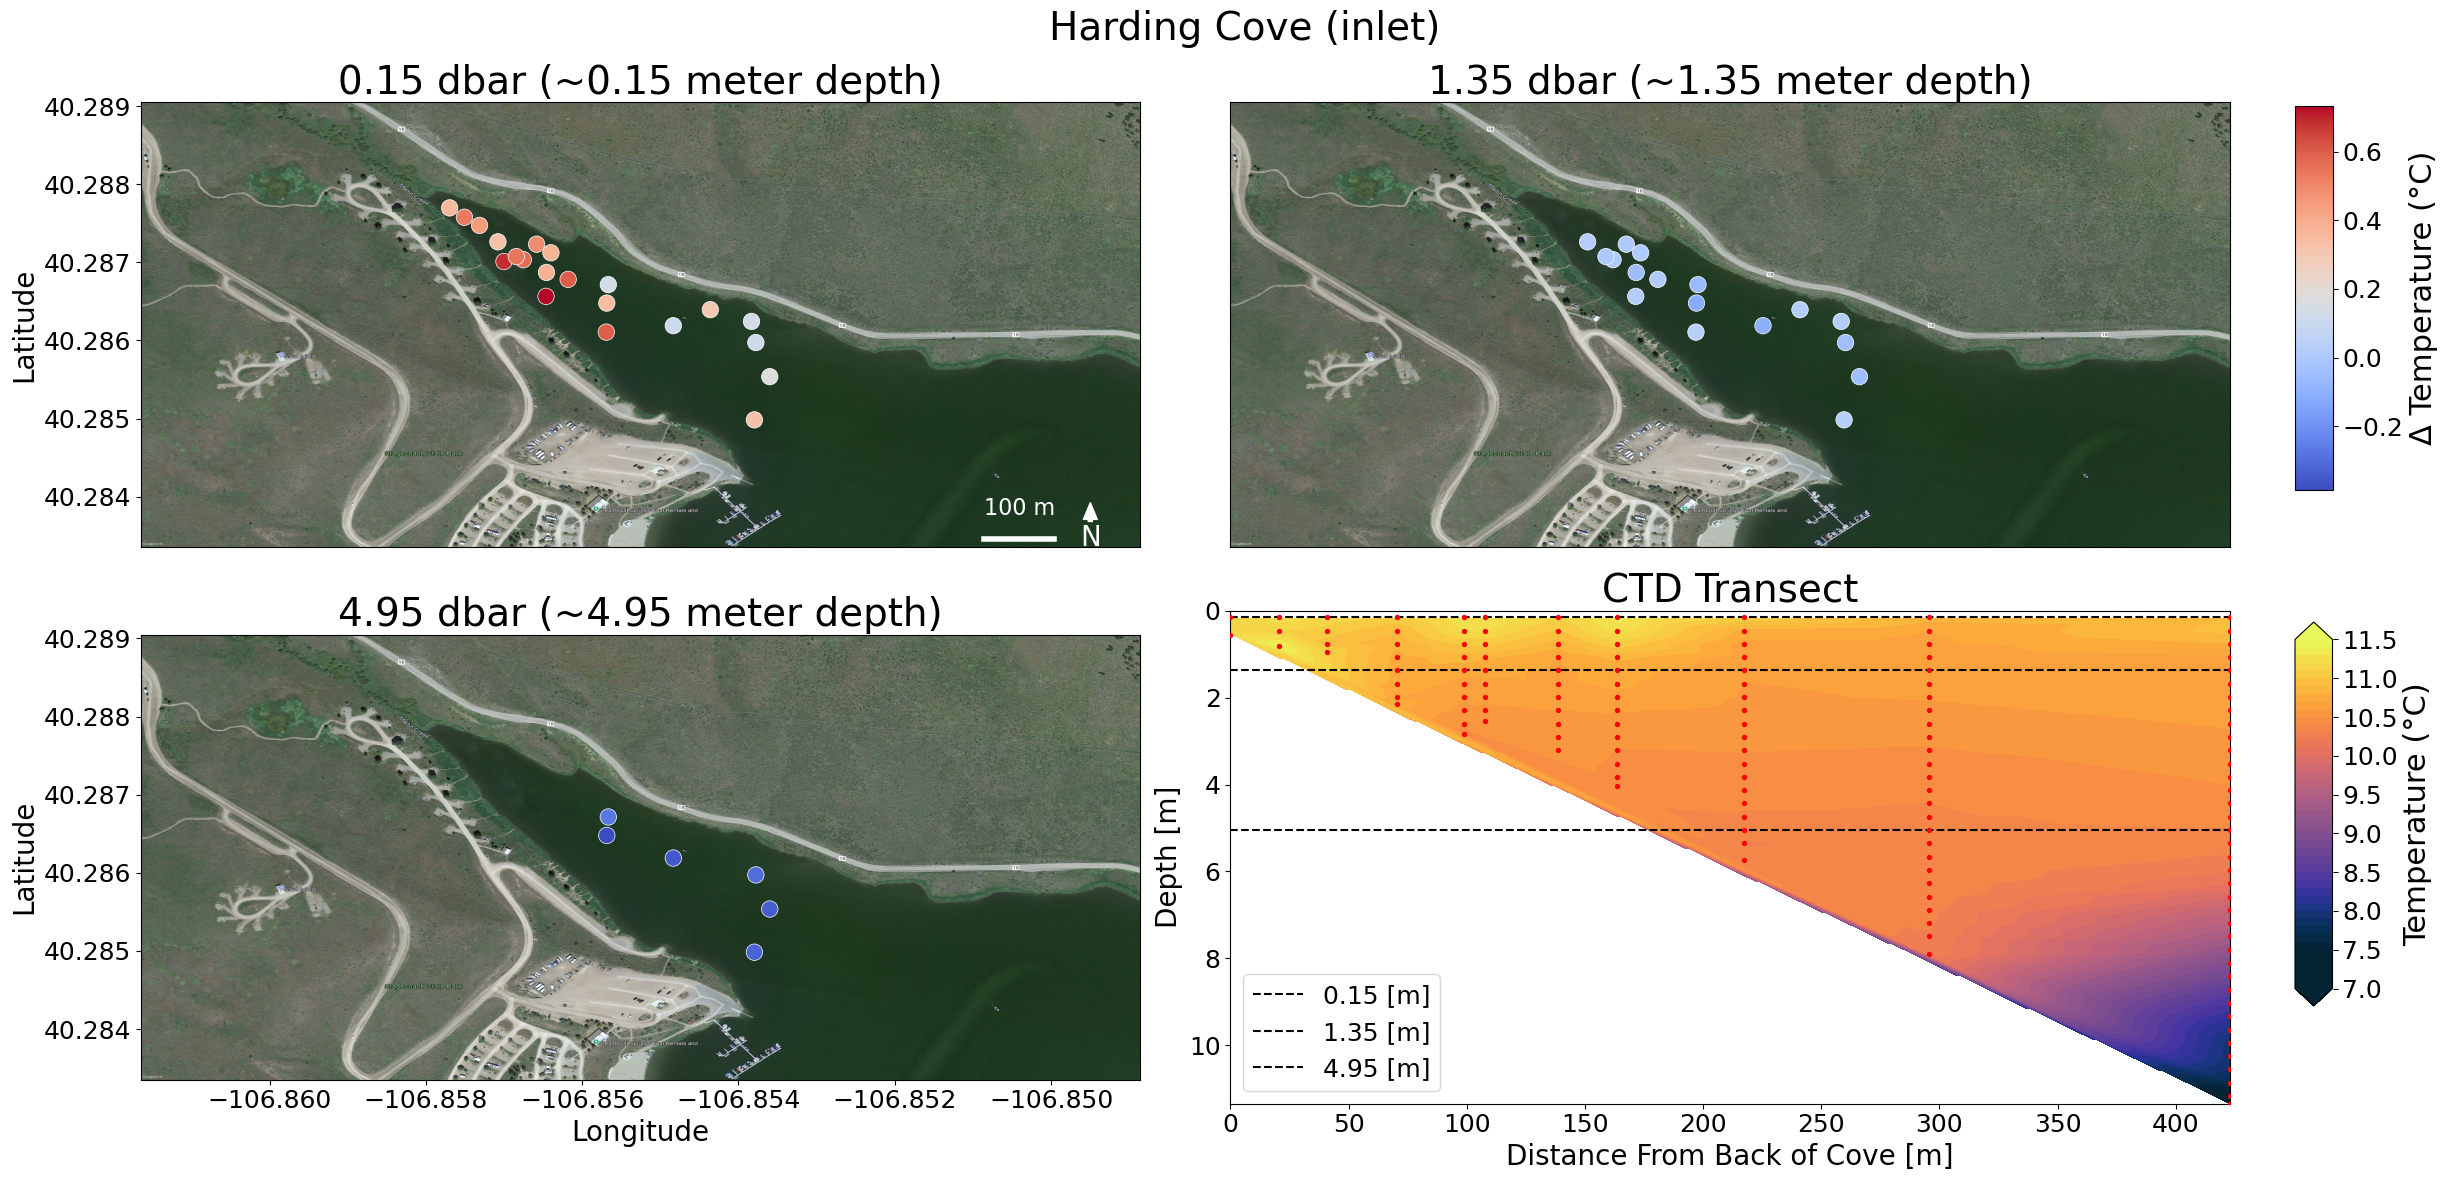

In [8]:
# define datasets and titles
pressure_levels = [pressure_p15, pressure_1p35, pressure_4p95]
titles = ['0.15 dbar (~0.15 meter depth)', '1.35 dbar (~1.35 meter depth)', '4.95 dbar (~4.95 meter depth)']

# find global min/max temperature for consistent color scaling
all_temps = pd.concat(pressure_levels)['meantemp']
vmin, vmax = all_temps.min(), all_temps.max()

fig, axs = plt.subplots(2, 2, figsize=(25, 12))

# plot the first 3 scatter maps
scatter_mappable = None
for ax, data, title in zip(axs.flat[:3], pressure_levels, titles):
    show(tif, ax=ax)
    sc = ax.scatter(
        data['Longitude'], data['Latitude'],
        c=data['meantemp'],
        cmap='coolwarm',
        s=140, edgecolor='white', linewidth=0.5,
        vmin=vmin, vmax=vmax
    )
    scatter_mappable = sc

    # north arrow only in top left
    if ax == axs[0, 0]:  
        # north arrow
        ax.annotate(
            'N', xy=(0.95, 0.10), xytext=(0.95, 0.02),
            arrowprops=dict(facecolor='white', edgecolor='white', width=3, headwidth=10),
            color='white', ha='center', va='center', fontsize=20,
            xycoords='axes fraction'
        )

        # 100 meter scale bar
        scale_deg = 0.000899 
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        # position near bottom right of the subplot
        x_start = xlim[1] - 0.002
        x_end   = x_start + scale_deg
        y_pos   = ylim[0] + 0.0001

        ax.plot([x_start, x_end], [y_pos, y_pos], color='white', linewidth=4, zorder=10)
        ax.text((x_start + x_end) / 2, y_pos + 0.00025, '100 m',
                ha='center', va='bottom', fontsize=16, color='white', zorder=10)

    ax.set_title(title, fontsize=28)

    idx = list(axs.flat).index(ax)
    row, col = divmod(idx, 2)

    if row == 1:
        ax.set_xlabel("Longitude", fontsize=20)
        ax.tick_params(axis='x', labelsize=18)
    else:
        ax.tick_params(axis='x', labelbottom=False, bottom=False)

    if col == 0:
        ax.set_ylabel("Latitude", fontsize=20)
        ax.tick_params(axis='y', labelsize=18)
    else:
        ax.tick_params(axis='y', labelleft=False, left=False)

    ax.xaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=False))
    ax.yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=False))
    ax.xaxis.get_major_formatter().set_useOffset(False)
    ax.yaxis.get_major_formatter().set_useOffset(False)

# CTD Transect
ax_transect = axs[1, 1]
levels = np.arange(7, 11.51, 0.1)
cf = ax_transect.contourf(D, Z, T, levels=levels, extend='both', vmin=7.5, vmax=11.5, cmap=cmocean.cm.thermal)
ax_transect.scatter(HAR_df.distance_m, HAR_df['Depth (m)'], s=8, c='red', zorder=4)
ax_transect.invert_yaxis()
ax_transect.set_xlabel('Distance From Back of Cove [m]', fontsize=20)
ax_transect.set_ylabel('Depth [m]', fontsize=20)
ax_transect.set_title('CTD Transect', fontsize=28)
ax_transect.tick_params(axis='both', labelsize=18)
ax_transect.axhline(y=depth_at_015, color='black', linestyle='--', linewidth=1.5, label='0.15 [m]')
ax_transect.axhline(y=depth_at_1_35, color='black', linestyle='--', linewidth=1.5, label='1.35 [m]')
ax_transect.axhline(y=depth_at_4_95, color='black', linestyle='--', linewidth=1.5, label='4.95 [m]')
ax_transect.legend(fontsize=18)

cbar_ax1 = fig.add_axes([0.92, 0.58, 0.015, 0.32])
cbar1 = fig.colorbar(scatter_mappable, cax=cbar_ax1)
cbar1.set_label("Δ Temperature (°C)", fontsize=22)
cbar1.ax.tick_params(labelsize=18)

# separate colorbar for CTD transect plot
cbar_ax2 = fig.add_axes([0.92, 0.15, 0.015, 0.32])
cbar2 = fig.colorbar(cf, cax=cbar_ax2)
cbar2.set_label("Temperature (°C)", fontsize=22)
cbar2.ax.tick_params(labelsize=18)

plt.suptitle("Harding Cove (inlet)", fontsize=28, y=0.98)
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()